# Income Classification Model

# Importing Libraries 

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data_inc.csv')

In [3]:
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


 Dropping unknown column

In [3]:
df.drop(['Unnamed: 15'],axis=1,inplace=True)

In [5]:
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
columns=df.columns

In [8]:
columns

Index(['Age', 'Profession Class', 'Final_census', ' Education',
       ' Education-num', ' marital-status', ' occupation', ' relationship',
       ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week',
       ' country', ' income'],
      dtype='object')

In [10]:
for i in columns:
    print(f'{i}:{df[i].unique()}')

Age:[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Profession Class:[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Final_census:[ 77516  83311 215646 ...  34066  84661 257302]
 Education:[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 Education-num:[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
 marital-status:[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 occupation:[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fis

We have values which is indicated as " ?" in the following columns which needs to be imputed
['Profession Class', 'occupation', 'country']


In [4]:
cols = ['Profession Class',' occupation',' country']

for i in cols:
    df[i].replace(' ?',df[i].mode()[0],inplace=True)

In [15]:
df['Profession Class'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Profession Class, dtype: int64

In [16]:
df[' occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

In [17]:
df[' country'].value_counts()

 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3    Education        32561 non-null  object
 4    Education-num    32561 non-null  int64 
 5    marital-status   32561 non-null  object
 6    occupation       32561 non-null  object
 7    relationship     32561 non-null  object
 8    race             32561 non-null  object
 9   Gender            32561 non-null  object
 10   capital-gain     32561 non-null  int64 
 11   capital-loss     32561 non-null  int64 
 12   hours-per-week   32561 non-null  int64 
 13   country          32561 non-null  object
 14   income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
df.isnull().sum()

Age                 0
Profession Class    0
Final_census        0
 Education          0
 Education-num      0
 marital-status     0
 occupation         0
 relationship       0
 race               0
Gender              0
 capital-gain       0
 capital-loss       0
 hours-per-week     0
 country            0
 income             0
dtype: int64

In [20]:
df.skew()

Age                 0.558743
Final_census        1.446980
 Education-num     -0.311676
 capital-gain      11.953848
 capital-loss       4.594629
 hours-per-week     0.227643
dtype: float64

There is skewness in the columns 
'Age','Final_census','Capital-gain','capital-loss' have positve skewness
'education-num' has negative skewness
hence we can conclude that all the numerical columns does not follow guasian distribution.


<AxesSubplot:xlabel='Age', ylabel='Density'>

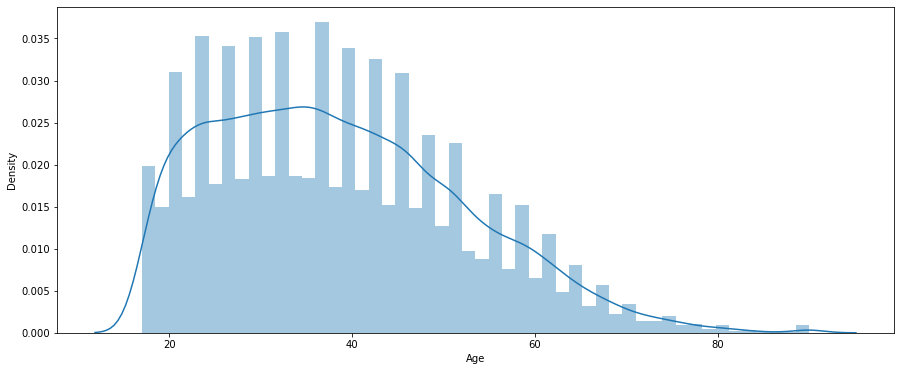

In [21]:
plt.figure(figsize=(15, 6))
sns.distplot(df['Age'], bins=50)

<AxesSubplot:xlabel='Final_census', ylabel='Density'>

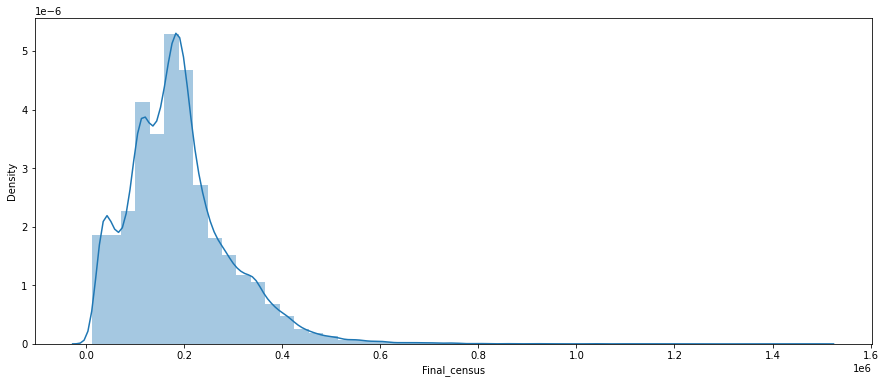

In [22]:
plt.figure(figsize=(15, 6))
sns.distplot(df['Final_census'], bins=50)

<AxesSubplot:xlabel=' Education-num', ylabel='Density'>

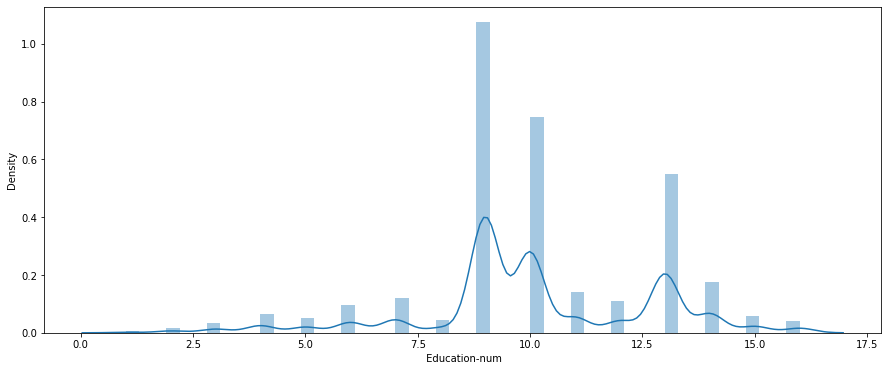

In [23]:
plt.figure(figsize=(15, 6))
sns.distplot(df[' Education-num'], bins=50)

<AxesSubplot:xlabel=' capital-gain', ylabel='Density'>

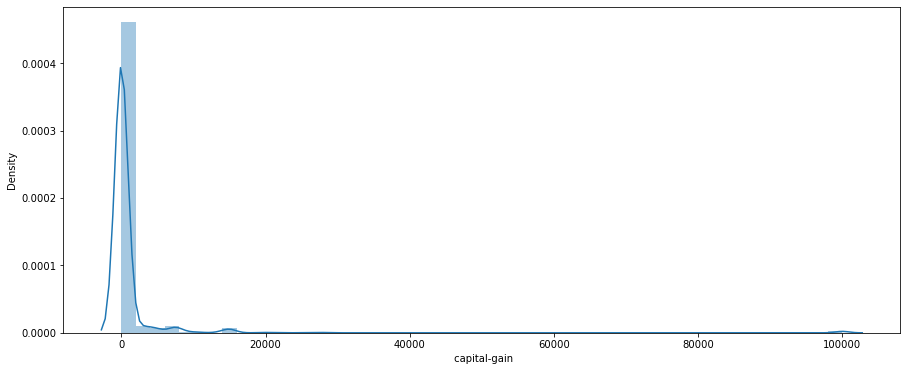

In [24]:
plt.figure(figsize=(15, 6))
sns.distplot(df[' capital-gain'], bins=50)

<AxesSubplot:xlabel=' hours-per-week', ylabel='Density'>

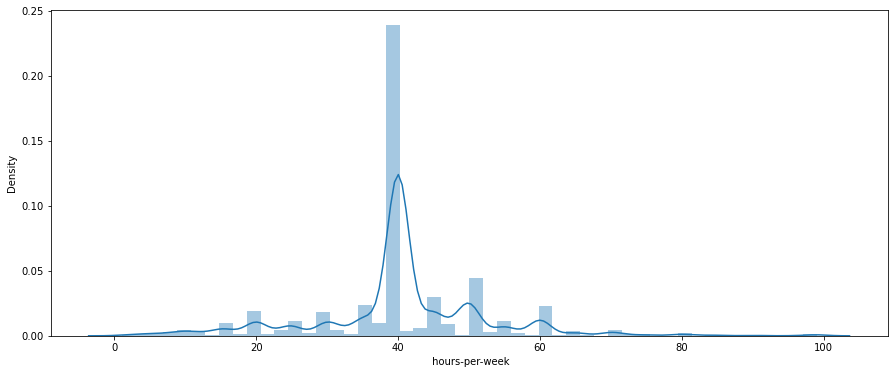

In [25]:
plt.figure(figsize=(15, 6))
sns.distplot(df[' hours-per-week'], bins=50)

In [26]:
df.kurt()

Age                 -0.166127
Final_census         6.218811
 Education-num       0.623444
 capital-gain      154.799438
 capital-loss       20.376802
 hours-per-week      2.916687
dtype: float64

From the kurtosis value we can conclude that there are outliers in the numerical columns

# EDA

Text(0.5, 0.98, 'Profession Class')

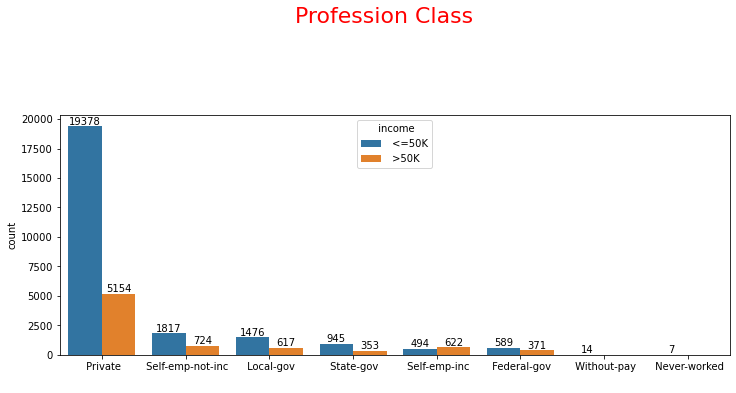

In [57]:
plt.subplots(1,1, figsize=(12, 15))

plt.subplot(3,1,1)
a = sns.countplot(x=df['Profession Class'],hue=df[" income"] , order = df['Profession Class'].value_counts(ascending=False).index)
values_1= df.loc[df[" income"]=="<=50K",'Profession Class'].value_counts()
values_2= df.loc[df[" income"]==">50K",'Profession Class'].value_counts()
a.bar_label(container=a.containers[0], labels=values_1)
a.bar_label(container=a.containers[1], labels=values_2)
plt.xlabel(" ")

plt.suptitle('Profession Class',color ='r',size = 25 )

There are maximum people from the class private and the least from the class 'never worked'

Text(0.5, 0.98, 'Education')

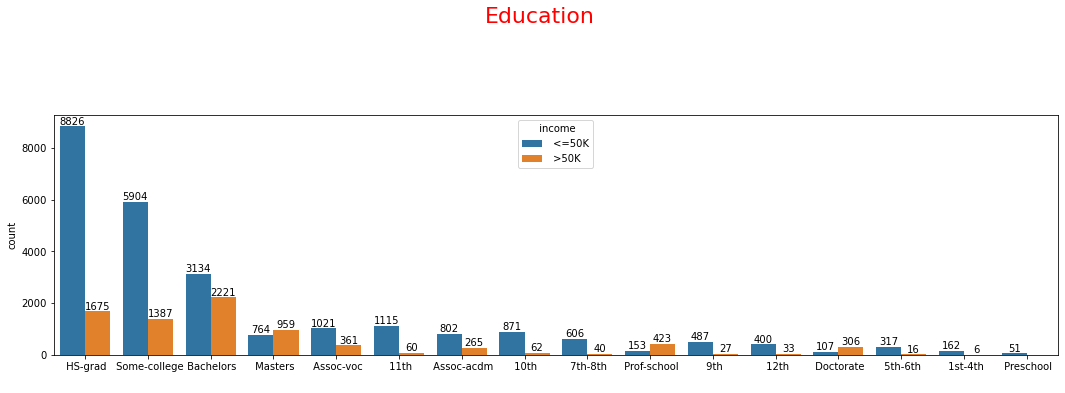

In [58]:
plt.subplots(1,1, figsize=(18, 15))

plt.subplot(3,1,1)
a = sns.countplot(x=df[' Education'],hue=df[" income"] , order = df[' Education'].value_counts(ascending=False).index)
values_1= df.loc[df[" income"]=="<=50K",' Education'].value_counts()
values_2= df.loc[df[" income"]==">50K",' Education'].value_counts()
a.bar_label(container=ax2.containers[0], labels=values_1)
a.bar_label(container=ax2.containers[1], labels=values_2)
plt.xlabel(" ")

plt.suptitle('Education',color ='r',size = 25 )

Text(0.5, 0.98, 'Marital status')

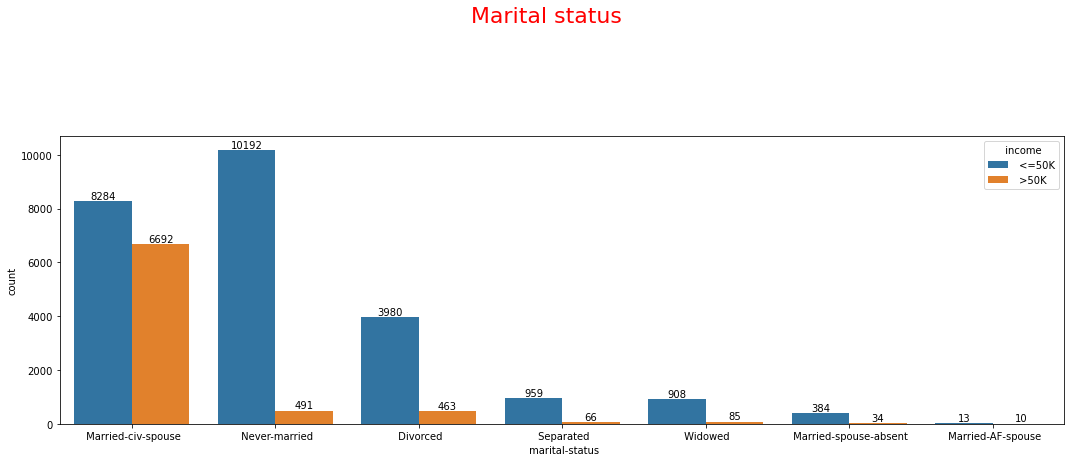

In [60]:
plt.subplots(1,1, figsize=(18, 18))

plt.subplot(3,1,1)
a=sns.countplot(x=df[' marital-status'],hue=df[" income"], order = df[' marital-status'].value_counts(ascending=False).index)
values_1= df.loc[df[" income"]=="<=50K",' marital-status'].value_counts()
values_2= df.loc[df[" income"]==">50K",' marital-status'].value_counts()
a.bar_label(container=a.containers[0], labels=values_1)
a.bar_label(container=a.containers[1], labels=values_2)
plt.suptitle('Marital status',color='r',size = 25)


Text(0.5, 0.98, 'Occupation')

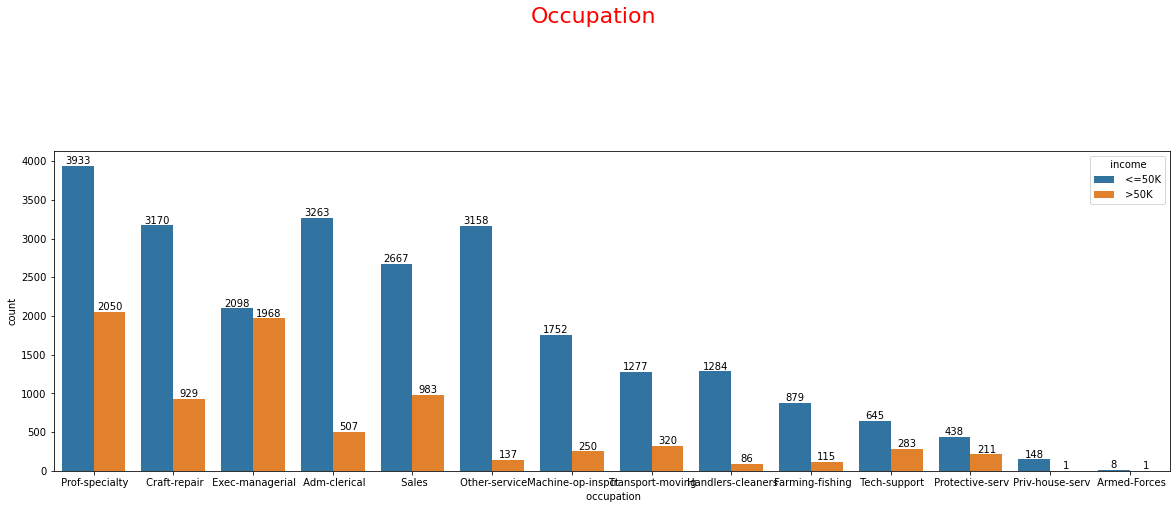

In [62]:
plt.subplots(1,1, figsize=(20, 20))

plt.subplot(3,1,1)
a=sns.countplot(x=df[' occupation'],hue=df[" income"], order = df[' occupation'].value_counts(ascending=False).index)
values_1= df.loc[df[" income"]=="<=50",' occupation'].value_counts()
values_2= df.loc[df[" income"]==">50",' occupation'].value_counts()
a.bar_label(container=a.containers[0], labels=values_1)
a.bar_label(container=a.containers[1], labels=values_2)
plt.suptitle('Occupation',color='r',size = 25)

Text(0.5, 0.98, 'Relationship')

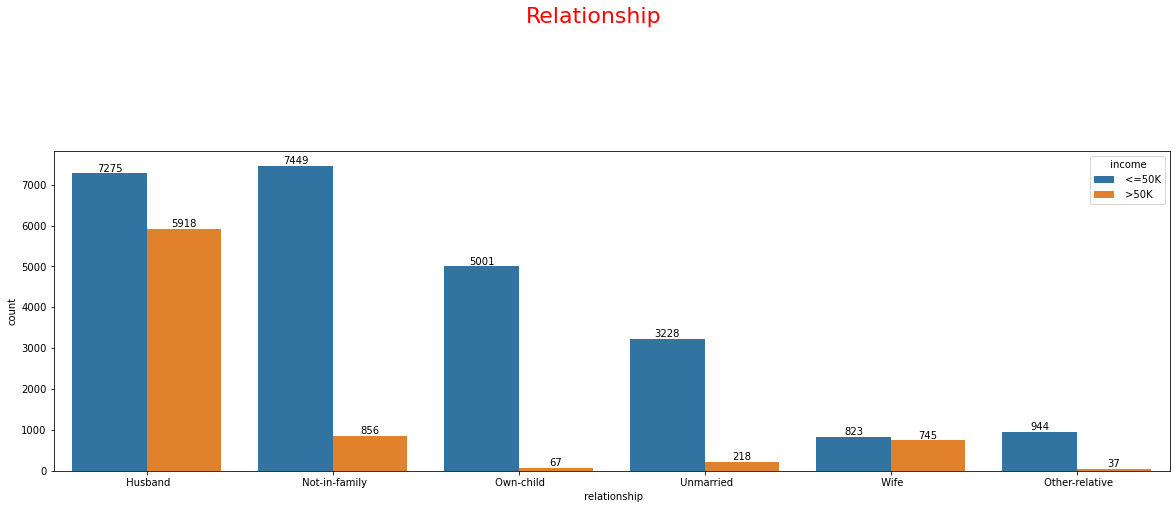

In [63]:
plt.subplots(1,1, figsize=(20, 20))

plt.subplot(3,1,1)
a=sns.countplot(x=df[' relationship'],hue=df[" income"], order = df[' relationship'].value_counts(ascending=False).index)
values_1= df.loc[df[" income"]=="<=50",' relationship'].value_counts()
values_2= df.loc[df[" income"]==">50",' relationship'].value_counts()
a.bar_label(container=a.containers[0], labels=values_1)
a.bar_label(container=a.containers[1], labels=values_2)
plt.suptitle('Relationship',color='r',size = 25)

Text(0.5, 0.98, 'Race')

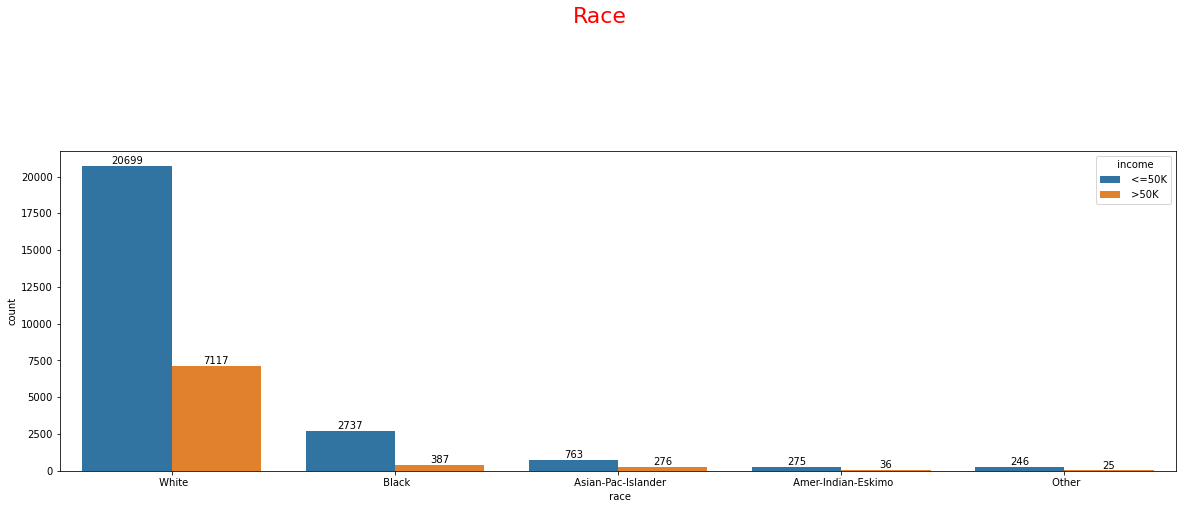

In [64]:
plt.subplots(1,1, figsize=(20, 20))

plt.subplot(3,1,1)
a=sns.countplot(x=df[' race'],hue=df[" income"], order = df[' race'].value_counts(ascending=False).index)
values_1= df.loc[df[" income"]=="<=50",' race'].value_counts()
values_2= df.loc[df[" income"]==">50",' race'].value_counts()
a.bar_label(container=a.containers[0], labels=values_1)
a.bar_label(container=a.containers[1], labels=values_2)
plt.suptitle('Race',color='r',size = 25)

Text(0.5, 0.98, 'Gender')

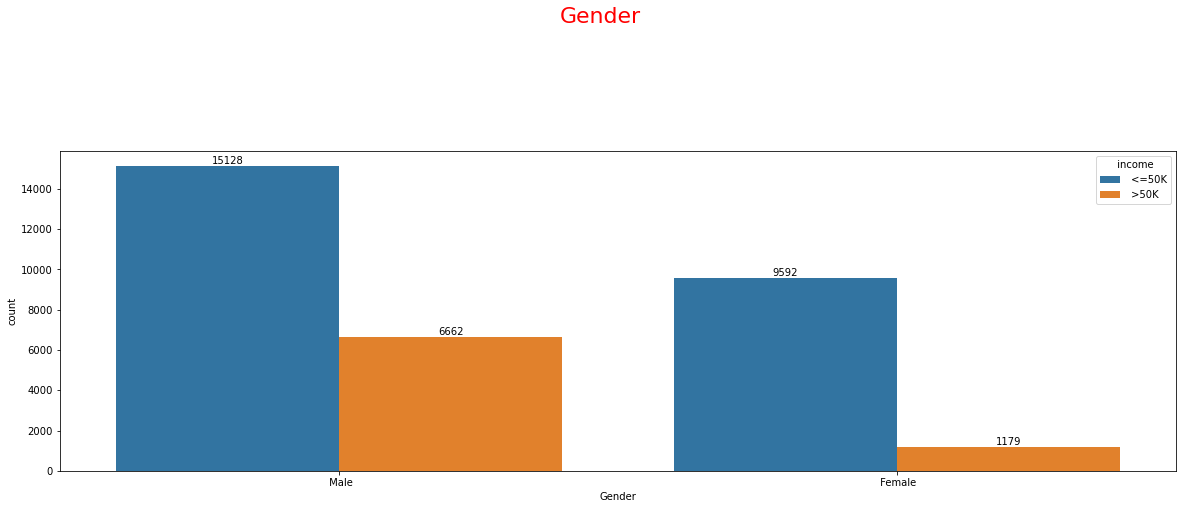

In [65]:
plt.subplots(1,1, figsize=(20, 20))

plt.subplot(3,1,1)
a=sns.countplot(x=df['Gender'],hue=df[" income"], order = df['Gender'].value_counts(ascending=False).index)
values_1= df.loc[df[" income"]=="<=50",'Gender'].value_counts()
values_2= df.loc[df[" income"]==">50",'Gender'].value_counts()
a.bar_label(container=a.containers[0], labels=values_1)
a.bar_label(container=a.containers[1], labels=values_2)
plt.suptitle('Gender',color='r',size = 25)

In [76]:
Country = df[[' country',' income']]
Country["Country_Group"] = np.where(Country[' country']==" United-States",'United-States','Others')

In [78]:
Country.head()

,country,income,Country_Group
0,United-States,<=50K,United-States
1,United-States,<=50K,United-States
2,United-States,<=50K,United-States
3,United-States,<=50K,United-States
4,Cuba,<=50K,Others


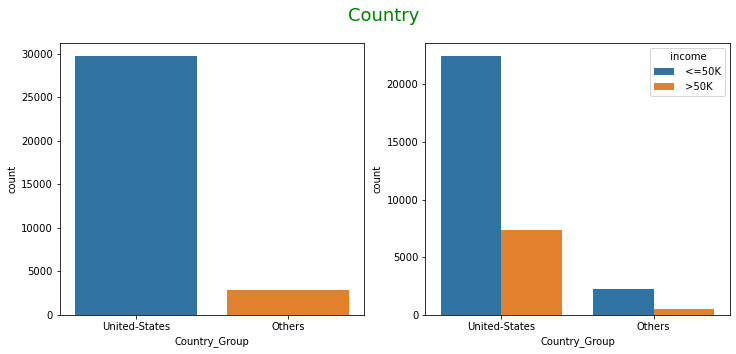

In [77]:
plt.subplots(1,2, figsize=(12, 5))

plt.subplot(1,2,1)
sns.countplot(Country['Country_Group'])

plt.subplot(1,2,2)
sns.countplot(Country['Country_Group'],hue=Country[' income'])
plt.suptitle('Country',color ='g',size = 18 )
plt.show()

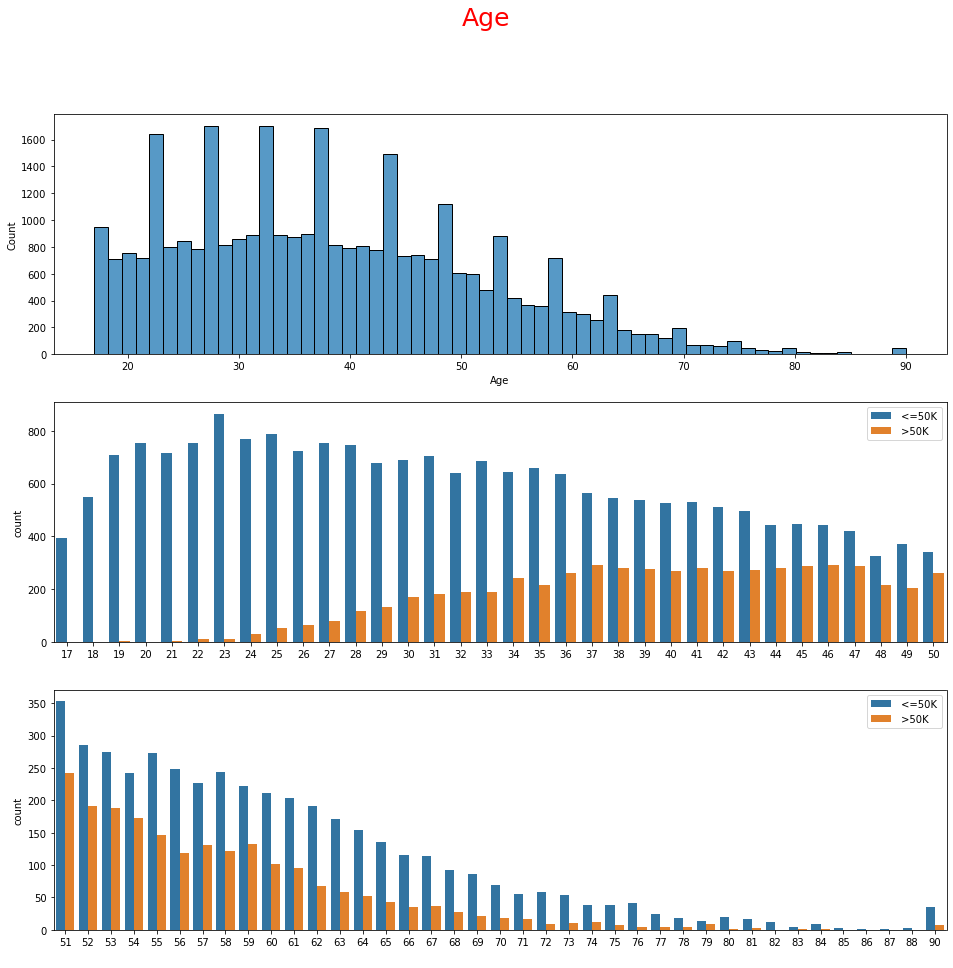

In [72]:
plt.subplots(3,1, figsize=(16, 15))

plt.subplot(3,1,1)
sns.histplot(df['Age'])


plt.subplot(3,1,2)
sns.countplot(x=df[df['Age']<=50]['Age'],hue=df[" income"] )
plt.legend(loc='upper right')
plt.xlabel(" ")

plt.subplot(3,1,3)
sns.countplot(x=df[df['Age']>50]['Age'],hue=df[" income"] )
plt.legend(loc='upper right')
plt.xlabel(" ")

plt.suptitle('Age',color ='r',size = 25 )

plt.show()

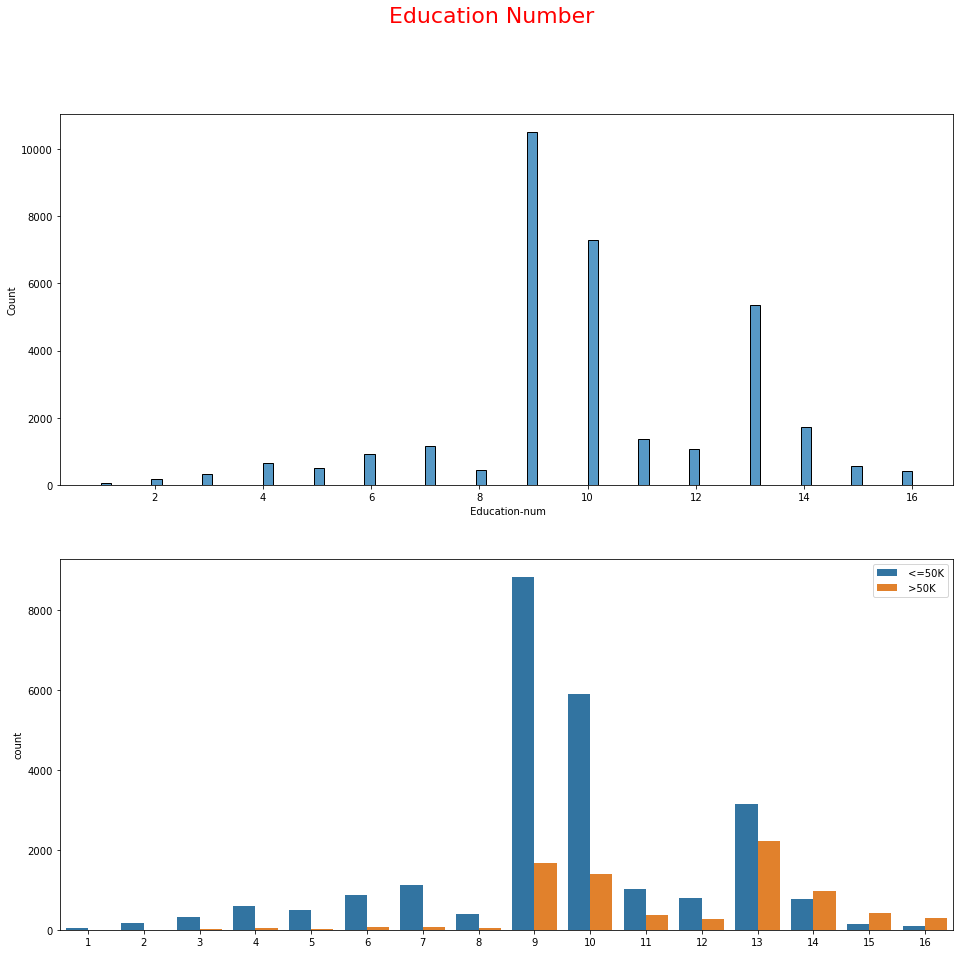

In [73]:

plt.subplots(2,1, figsize=(16, 15))

plt.subplot(2,1,1)
sns.histplot(df[' Education-num'])


plt.subplot(2,1,2)
sns.countplot(x=df[' Education-num'],hue=df[" income"] )
plt.legend(loc='upper right')
plt.xlabel(" ")


plt.suptitle('Education Number',color ='r',size = 22 )

plt.show()

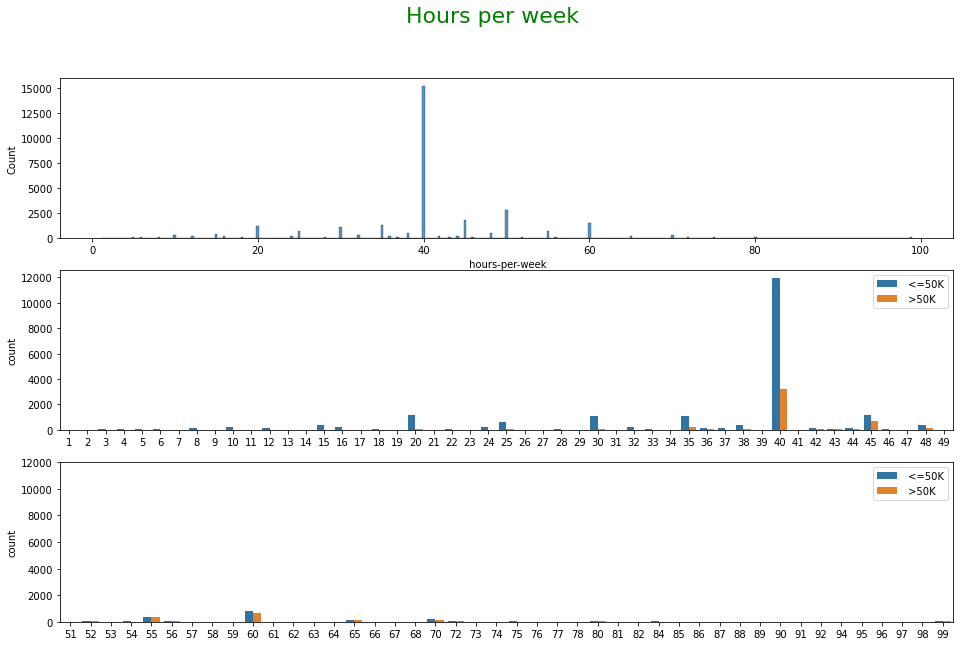

In [74]:
# Hours per week distribution

plt.subplots(3,1, figsize=(16, 10))

plt.subplot(3,1,1)
sns.histplot(df[' hours-per-week'])

plt.subplot(3,1,2)
sns.countplot(x=df[df[' hours-per-week']<50][' hours-per-week'],hue=df[" income"] )
plt.legend(loc='upper right')
plt.xlabel(" ")

plt.subplot(3,1,3)
sns.countplot(x=df[df[' hours-per-week']>50][' hours-per-week'],hue=df[" income"] )
plt.legend(loc='upper right')
plt.ylim(0, 12000)
plt.xlabel(" ")


plt.suptitle('Hours per week',color ='g',size = 22 )

plt.show()

In [79]:
Capital = df[[' capital-gain',' capital-loss',' income']]
Capital["Capital_Gain"] = np.where(Capital[' capital-gain']>0,'Gain','Did not gain')
Capital["Capital_Loss"] = np.where(Capital[' capital-loss']>0,'Loss','Did not loss')

<AxesSubplot:xlabel='Capital_Gain', ylabel='count'>

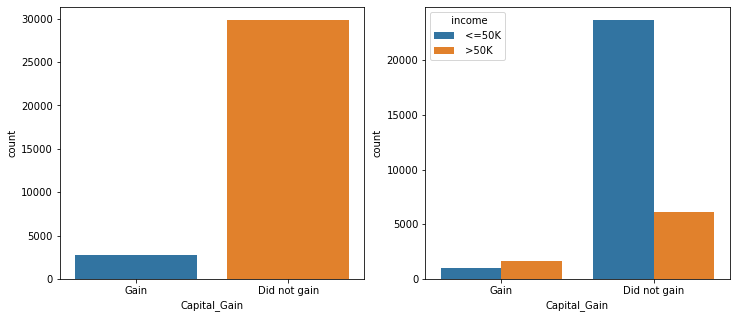

In [80]:
plt.subplots(1,2, figsize=(12, 5))

plt.subplot(1,2,1)
sns.countplot(Capital['Capital_Gain'])

plt.subplot(1,2,2)
sns.countplot(Capital['Capital_Gain'],hue=Capital[' income'])

<AxesSubplot:xlabel='Capital_Loss', ylabel='count'>

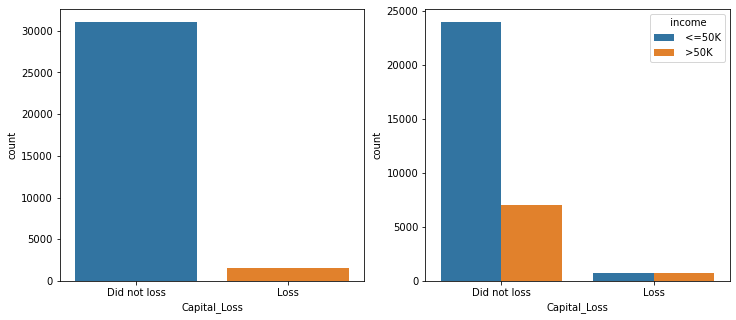

In [81]:
plt.subplots(1,2, figsize=(12, 5))

plt.subplot(1,2,1)
sns.countplot(Capital['Capital_Loss'])

plt.subplot(1,2,2)
sns.countplot(Capital['Capital_Loss'],hue=Capital[' income'])

# MODEL

In [5]:
data = df.copy()

Outlier Treatment

In [6]:
# Numeric Columns

Num_cols = [i for i in data.columns if data[i].dtype!='O']
print(Num_cols)

['Age', 'Final_census', ' Education-num', ' capital-gain', ' capital-loss', ' hours-per-week']


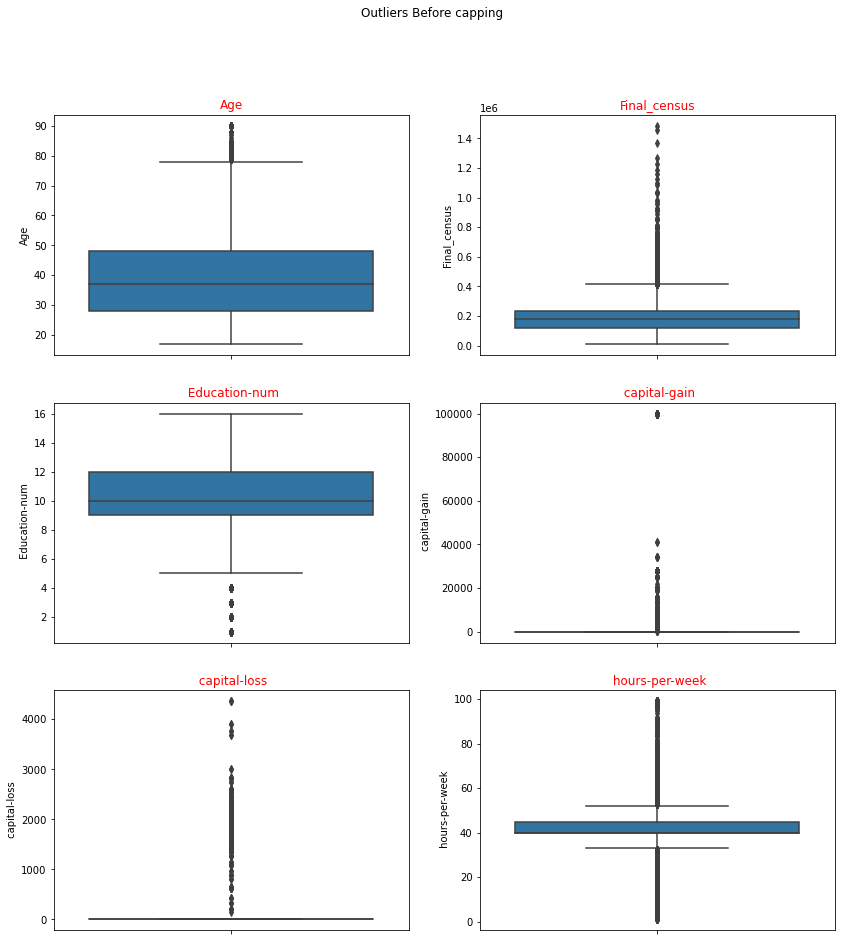

In [85]:
plt.subplots(3,2,figsize=(14,15))

for i,j in enumerate(Num_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot( y = data[j])
    plt.title(j,color = 'r')
    
plt.suptitle('Outliers Before capping')
plt.show()

In [7]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
Upper_fence = (Q3+(1.5*IQR))
Lower_fence = (Q1-(1.5*IQR))
print("Upper fence : \n\n",Upper_fence)
print("Lower fence : \n\n",Lower_fence)

Upper fence : 

 Age                    78.0
Final_census       415887.0
 Education-num         16.5
 capital-gain           0.0
 capital-loss           0.0
 hours-per-week        52.5
dtype: float64
Lower fence : 

 Age                   -2.0
Final_census      -61009.0
 Education-num         4.5
 capital-gain          0.0
 capital-loss          0.0
 hours-per-week       32.5
dtype: float64


In [8]:
data["Age"]=np.where(data["Age"]>78.0,78.0,np.where(data["Age"]<-2.0,-2.0,data["Age"]))

data["Final_census"]=np.where(data["Final_census"]>415887.0,415887.0,data["Final_census"])

data[" Education-num"]=np.where(data[" Education-num"]>16.5,16.5,
                                np.where(data[" Education-num"]<4.5,4.5,
                                         data[" Education-num"]))
data[" hours-per-week"]=np.where(data[" hours-per-week"]>52.5,52.5,
                                 np.where(data[" hours-per-week"]<32.5,32.5,
                                          data[" hours-per-week"]))

Label Encoding

In [9]:
cols = [i for i in data.columns if data[i].dtype=='O' and i!=' income']

data=pd.get_dummies(data,columns=cols,drop_first=True)

In [10]:
data[' income'] = data[' income'].map({' <=50K':0,' >50K':1})

In [91]:
data.head()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,income,Profession Class_ Local-gov,Profession Class_ Never-worked,Profession Class_ Private,Profession Class_ Self-emp-inc,Profession Class_ Self-emp-not-inc,Profession Class_ State-gov,Profession Class_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,Gender_ Male,country_ Canada,country_ China,country_ Columbia,country_ Cuba,country_ Dominican-Republic,country_ Ecuador,country_ El-Salvador,country_ England,country_ France,country_ Germany,country_ Greece,country_ Guatemala,country_ Haiti,country_ Holand-Netherlands,country_ Honduras,country_ Hong,country_ Hungary,country_ India,country_ Iran,country_ Ireland,country_ Italy,country_ Jamaica,country_ Japan,country_ Laos,country_ Mexico,country_ Nicaragua,country_ Outlying-US(Guam-USVI-etc),country_ Peru,country_ Philippines,country_ Poland,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,39.0,77516.0,13.0,0.0,0.0,40.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50.0,83311.0,13.0,0.0,0.0,32.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Checking for multicolinearity

In [92]:
data1 = data.copy()

In [99]:
corr_mat = data1.corr(method="spearman")
upper_mat=corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(bool))

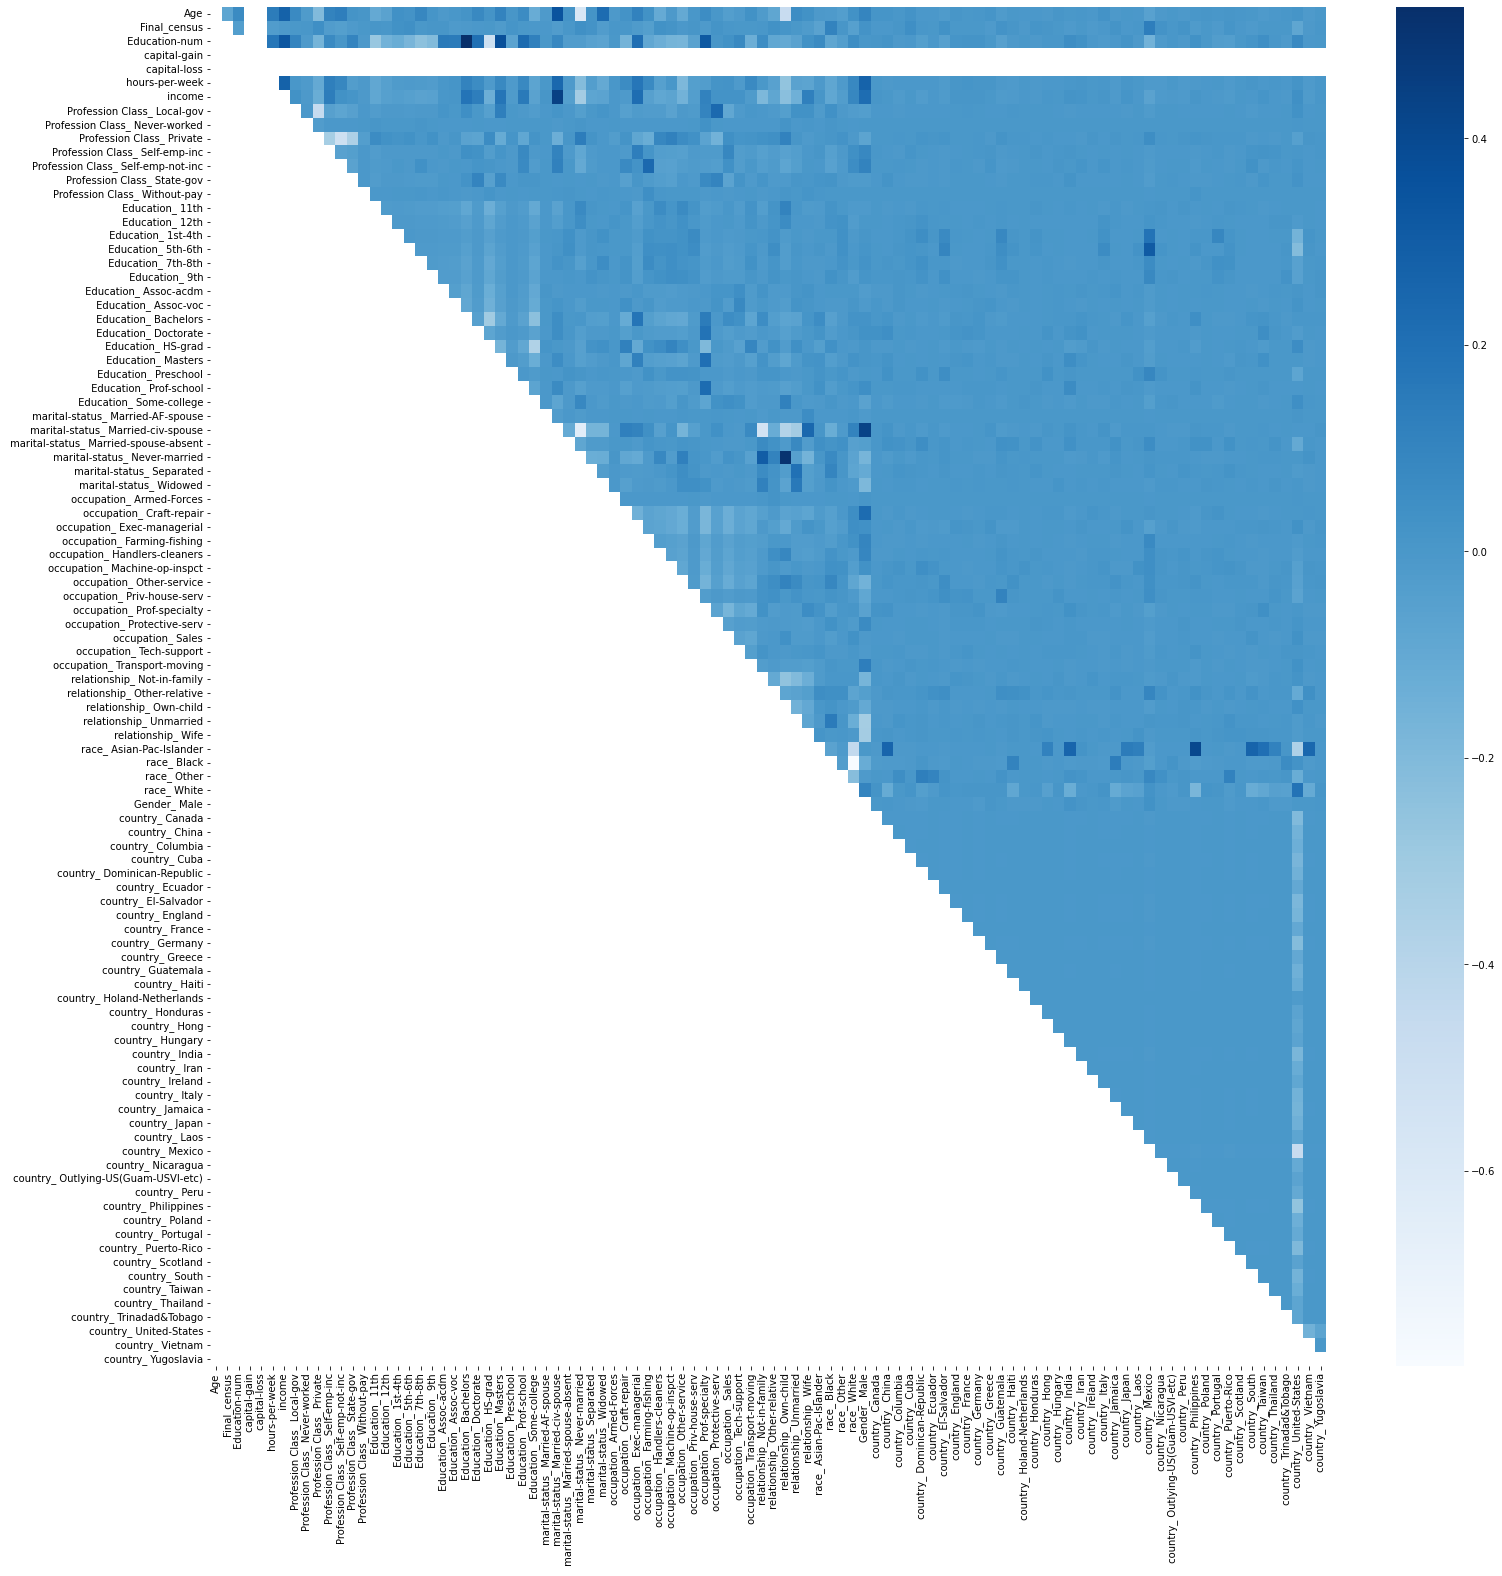

In [102]:
plt.figure(figsize=(25,25))
sns.heatmap(upper_mat,cmap='Blues')
plt.show()

In [103]:
high_positive_corr = [i for i in upper_mat.columns if any(upper_mat[i]>0.8)]
high_negative_corr = [j for j in upper_mat.columns if any(upper_mat[j]<-0.8)]

In [104]:
High_corr = high_negative_corr+high_positive_corr
High_corr

[]

We dont have any columns with high correlation

Dependent and Independent

In [14]:
X = data.drop([' income'],axis=1)
Y = data[' income']

 Feature Selection

In [11]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif

In [12]:
feature_kbest = SelectKBest(score_func=mutual_info_classif)

In [15]:
feature_kbest.fit(X,Y)

SelectKBest(score_func=<function mutual_info_classif at 0x000002328EB054C0>)

In [16]:
Feature_score = pd.DataFrame()

In [17]:
Feature_score["Column"] = X.columns
Feature_score["Mutual_Score"] = feature_kbest.scores_

In [18]:
Feature_Sorted = Feature_score.sort_values(by='Mutual_Score',ascending=False,ignore_index=True)
Feature_Sorted

,Column,Mutual_Score
0,marital-status_ Married-civ-spouse,0.104781
1,capital-gain,0.083389
2,Age,0.066785
3,marital-status_ Never-married,0.062997
4,Education-num,0.062062
5,hours-per-week,0.041820
6,relationship_ Own-child,0.040401
7,Final_census,0.033142
8,capital-loss,0.032945
9,Gender_ Male,0.025428


In [19]:
Percentage = [(i/sum(Feature_Sorted['Mutual_Score']))*100 for i in Feature_Sorted['Mutual_Score']]
cList = []
a= 0
for i in Percentage:
    cList.append(a+i)
    a=a+i

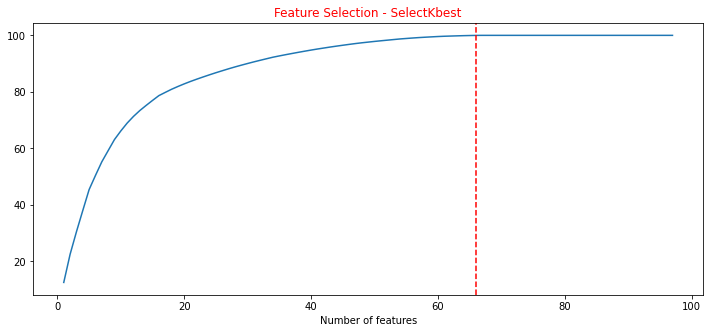

In [20]:
plt.figure(figsize=(12,5))
graph = sns.lineplot(range(1,98),cList)
graph.axvline(66,ls="--",color='r')
plt.title("Feature Selection - SelectKbest",color='r')
plt.xlabel('Number of features')
plt.show()

 We can see that **Top 66 fields** have some amount of mutual scores rather than Zero(Approx).
    So we can chose those field alone for our model.

In [21]:
Unwanted_Features = list(Feature_Sorted['Column'][67:])

In [22]:
X_feature = X.copy()

In [23]:
X_feature.drop(columns=Unwanted_Features,axis=1,inplace=True)

In [24]:
X_feature.shape

(32561, 67)

Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train , X_test , Y_train , Y_test = train_test_split(X_feature,Y,test_size=0.2,random_state=10,stratify=Y)

Scaling the data

In [27]:
from sklearn.preprocessing import MinMaxScaler 

In [28]:
scaler = MinMaxScaler().fit(X_train)

In [29]:
X_Scale_train = scaler.transform(X_train)

In [30]:
X_train = pd.DataFrame(X_Scale_train,columns=X_feature.columns)
X_train.head()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,Profession Class_ Local-gov,Profession Class_ Never-worked,Profession Class_ Private,Profession Class_ Self-emp-inc,Profession Class_ Self-emp-not-inc,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,marital-status_ Married-civ-spouse,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Black,race_ White,Gender_ Male,country_ China,country_ Columbia,country_ France,country_ Greece,country_ Guatemala,country_ India,country_ Iran,country_ Italy,country_ Jamaica,country_ Japan,country_ Laos,country_ Mexico,country_ Philippines,country_ Poland,country_ Puerto-Rico,country_ Scotland,country_ Taiwan,country_ Thailand,country_ United-States,country_ Vietnam
0,0.475410,1.000000,0.391304,0.04386,0.0,0.375,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.311475,0.090899,0.478261,0.00000,0.0,0.375,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.426230,0.329919,0.739130,0.00000,0.0,0.275,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.786885,0.256780,0.739130,0.00000,0.0,0.375,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.344262,0.067693,0.739130,0.00000,0.0,0.375,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
X_Scale_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_Scale_test,columns=X_feature.columns)
X_test.shape

(6513, 67)

In [50]:
Y_test.value_counts()

0    4945
1    1568
Name:  income, dtype: int64

Here MinMaxScaler was used because the dataset is non parametric dataset, and only the xtrain part was scaled becuase real life data wont be scaled , so using scaler only to train the model , testing with actual data 

Model Building

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier

In [33]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
gnb = GaussianNB()
light = LGBMClassifier()
ada = AdaBoostClassifier()

In [34]:
ML_model = [LR,KNN,gnb,dt,rf,light,svc,ada]

In [38]:
from sklearn.metrics import accuracy_score

In [138]:

for model in ML_model:
    print("=========="*5)
    print("Performance of", model)
    print("-------"*5)
    
    alg=model.fit(X_train,Y_train)
    y_pred_train=alg.predict(X_train)
    y_pred_test=alg.predict(X_test)
    train=accuracy_score(Y_train,y_pred_train)
    test=accuracy_score(Y_test,y_pred_test)
    
    # printing the metrics
    
    print(f"Training Accuracy score {(train)*100:.2f}%")
    print(f"Testing Accuracy score {(test)*100:.2f}%")
    print('\n')

Performance of LogisticRegression()
-----------------------------------
Training Accuracy score 83.63%
Validation Accuracy score 83.08%


Performance of KNeighborsClassifier()
-----------------------------------
Training Accuracy score 87.04%
Validation Accuracy score 81.31%


Performance of GaussianNB()
-----------------------------------
Training Accuracy score 54.18%
Validation Accuracy score 53.62%


Performance of DecisionTreeClassifier()
-----------------------------------
Training Accuracy score 99.99%
Validation Accuracy score 77.40%


Performance of RandomForestClassifier()
-----------------------------------
Training Accuracy score 99.99%
Validation Accuracy score 82.17%


Performance of LGBMClassifier()
-----------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6273, number of negative: 19775
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.00

We can see LGBM , ADAboost,Logistic regression and SVC provided the top testing accuracy and performed best .so we can finetune using hyper parameter tuning 

In [139]:
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN

In [140]:
#Before Sampling
Y_train.value_counts()

0    19775
1     6273
Name:  income, dtype: int64

In [141]:
#SMOTE

X_train_over_1 , Y_train_over_1 = SMOTE().fit_resample(X_train,Y_train)
Y_train_over_1.value_counts()

1    19775
0    19775
Name:  income, dtype: int64

In [142]:
#RandomOverSampler

X_train_over_2 , Y_train_over_2 = RandomOverSampler().fit_resample(X_train,Y_train)
Y_train_over_2.value_counts()

1    19775
0    19775
Name:  income, dtype: int64

In [144]:
ML_models = [light , svc , ada,LR]

In [145]:
Train_test_over = [("SMOTE",X_train_over_1,Y_train_over_1),
                   ("Random_Over_Sampler",X_train_over_2,Y_train_over_2),
                   ]


for i,j,k in Train_test_over:
    print("=========="*5)
    print(i)
    print("=========="*5)
    
    for model in ML_models:
    
        print("Performance of", model)
        print("-------"*5)
    
        alg=model.fit(j,k)
        y_pred_train=alg.predict(j)
        y_pred_test=alg.predict(X_test)
        train=accuracy_score(k,y_pred_train)
        test=accuracy_score(Y_test,y_pred_test)
    
        # printing the metrics
    
        print(f"Training Accuracy score {(train)*100:.2f}%")
        print(f"Testing Accuracy score {(test)*100:.2f}%")

        print('\n')

SMOTE
Performance of LGBMClassifier()
-----------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19775, number of negative: 19775
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2796
[LightGBM] [Info] Number of data points in the train set: 39550, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training Accuracy score 88.76%
Testing Accuracy score 82.37%


Performance of SVC()
-----------------------------------
Training Accuracy score 83.02%
Testing Accuracy score 78.41%


Performance of AdaBoostClassifier()
-----------------------------------
Training Accuracy score 83.75%
Testing Accuracy score 79.50%


Performance of LogisticRe

Over sampling approach does not provide better result than the normal approach , so better to use normal approach to fine tune the parameters

In [146]:
from sklearn.model_selection import RandomizedSearchCV

In [147]:
lgbm_params = {"max_depth": np.arange(1,11),
               "n_estimators": [int(i) for i in np.linspace(100,1000,10)],
              "num_leaves" : np.arange(1,16,2),
              "min_child_samples" : np.arange(1,11,2),
              "min_child_weight": np.arange(0.001,0.011,0.001),
              "boosting_type" : ['gbdt','dart', 'goss','rf']}

In [148]:
ada_params = {"n_estimators": [int(i) for i in np.linspace(100,1000,10)],
              "learning_rate" : np.arange(0.1,1.1,0.1)}

In [150]:
svc_params = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
              "gamma" : ['scale', 'auto']}


In [153]:
LR_params = {"C" : np.logspace(0, 4, num=10),
            'penalty' : ['l1','l2']}

In [154]:
hyp_para = [("LGBM",LGBMClassifier(),lgbm_params),
            ("Adaboost",AdaBoostClassifier(),ada_params),
            ("SVC",SVC(),svc_params),
           ("LR",LogisticRegression(),LR_params)]

In [155]:
model_param ={}
for model, regressor, param in hyp_para:
    random = RandomizedSearchCV(estimator=regressor,
                               param_distributions=param,
                               n_iter=100,
                               random_state=10,
                               cv=3,
                               verbose=2,
                               n_jobs=-1)
    random.fit(X_train,Y_train)
    model_param[model] = random.best_params_

for i in model_param:
    print(f"---------------------{i}---------------------")
    print(model_param[i])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6273, number of negative: 19775
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 472
[LightGBM] [Info] Number of data points in the train set: 26048, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240825 -> initscore=-1.148164
[LightGBM] [Info] Start training from score -1.148164
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
---------------------LGBM---------------------
{'num_leaves': 7, 'n_estimators': 1000, 'min_child_weight': 0.008, 'mi

In [36]:
lgbm=LGBMClassifier(num_leaves= 7,n_estimators= 1000, min_child_weight= 0.008, min_child_samples= 3, max_depth= 3, boosting_type='dart')
ada=AdaBoostClassifier(n_estimators = 300, learning_rate= 0.4)
svc=SVC(kernel= 'linear', gamma= 'scale')
LR=LogisticRegression(penalty= 'l2', C=7.742636826811269)

In [158]:
ML_models = [lgbm,ada,svc,LR]

In [160]:
for model in ML_models:
    print("=========="*5)
    print("Performance of", model)
    print("-------"*5)
    
    alg=model.fit(X_train,Y_train)
    y_pred_train=alg.predict(X_train)
    y_pred_test=alg.predict(X_test)
    train=accuracy_score(Y_train,y_pred_train)
    test=accuracy_score(Y_test,y_pred_test)
    
    # printing the metrics
    
    print(f"Training Accuracy score {(train)*100:.2f}%")
    print(f"Testing Accuracy score {(test)*100:.2f}%")
    print('\n')

Performance of LGBMClassifier(boosting_type='dart', max_depth=3, min_child_samples=3,
               min_child_weight=0.008, n_estimators=1000, num_leaves=7)
-----------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6273, number of negative: 19775
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 472
[LightGBM] [Info] Number of data points in the train set: 26048, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240825 -> initscore=-1.148164
[LightGBM] [Info] Start training from score -1.148164
Training Accuracy score 85.01%
Testing Accuracy score 84.26%


Performance of AdaBoostClassifier(learning_rate=0.4, n_estimators=300)
-----------------------------------


In [46]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
alg=lgbm.fit(X_train,Y_train)
y_pred_train=alg.predict(X_train)
y_pred_test=alg.predict(X_test)
train=accuracy_score(Y_train,y_pred_train)
test=accuracy_score(Y_test,y_pred_test)
Report = classification_report(Y_test,y_pred_test)

print(f"Training Accuracy score {(train)*100:.2f}%")
print(f"Testing Accuracy score {(test)*100:.2f}%")
print("Classification Report /n")
print(Report)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6273, number of negative: 19775
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 26048, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240825 -> initscore=-1.148164
[LightGBM] [Info] Start training from score -1.148164
Training Accuracy score 87.85%
Testing Accuracy score 87.15%
Classification Report /n
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4945
           1       0.79      0.64      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weight

In [48]:
cm = confusion_matrix(Y_test,y_pred_test)

In [49]:
cm

array([[4676,  269],
       [ 568, 1000]], dtype=int64)